<a href="https://colab.research.google.com/github/Aryann29/Steel_Price_Prediction--daily-offers-overdose.ai-/blob/main/daily_offers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Required Modules

In [ ]:
!pip install lazypredict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Data and libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV


In [ ]:
dfa = pd.read_csv('/content/drive/MyDrive/overdose.ai/datasets/daily_offers.csv', low_memory=False)

# EDA

In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
dfa.sample(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
74470,F4DEC284-C56A-4083-9E84-69705BBEB3A5,20201216.00,10.77982371,30202938.00,25.00,Won,W,41.00,2.50,1350.00,0000000000000000000000000000000000101892,164141591,20210101.00,828.00
101026,AC3903D1-144D-44FD-A406-BAEDA7461B9F,20201118.00,28.93850677,30147722.00,78.00,Won,W,41.00,0.50,1210.00,NaN,611993,20201201.00,913.00
56615,422FF40E-E4FA-4CDB-AAAD-5FE6494A5DB1,20210121.00,753.6071089,30268901.00,28.00,Won,PL,10.00,14.99,1500.00,NADS3JRGS,1670798778,20210201.00,761.50
12864,D0CA7D00-54FC-48F0-911F-33F9214DE7DD,20210317.00,23.89995344,30161088.00,78.00,Won,W,10.00,1.50,1150.00,DX51D+Z100 EKO 2.2,164141591,20210601.00,959.00
128764,ECEBEDAA-84F1-424B-9E09-707595CB44FE,20201007.00,33.82052852,30198507.00,26.00,Won,W,10.00,1.00,1408.00,0000000000000000000000000000000015039887,628377,20210101.00,717.00


In [ ]:
dfa.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
dfa.describe().applymap(lambda x: f'{x:.2f}')

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,181672.00,181672.00,181645.00,181649.00,181672.00,181673.00,181673.00,181672.00,181672.00
mean,20204588.23,30512209.03,44.89,25.62,2.56,1295.29,473967910.72,20207381.56,1918.04
std,4551.12,24333815.58,24.40,17.75,6.57,261.63,717510064.71,24110.59,331795.64
min,19950000.00,12458.00,25.00,2.00,0.18,1.00,611728.00,20190401.00,-1160.00
25%,20200929.00,30196884.00,26.00,10.00,0.70,1180.00,611993.00,20201101.00,669.00
50%,20201130.00,30205242.00,30.00,15.00,1.50,1250.00,640665.00,20210101.00,812.00
75%,20210203.00,30280416.00,78.00,41.00,3.00,1500.00,1332077137.00,20210401.00,953.00
max,20210401.00,2147483647.00,113.00,99.00,2500.00,2990.00,1722207579.00,30310101.00,100001015.00


In [ ]:
dfa = dfa.drop('id' , axis=1)

# Handling missing values and visualization

<AxesSubplot:xlabel='selling_price', ylabel='thickness'>

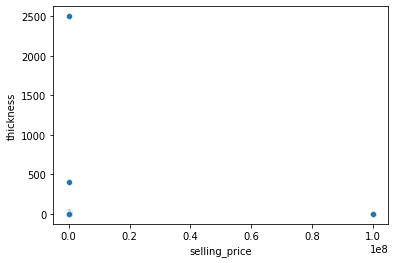

In [ ]:
sns.scatterplot(dfa['selling_price'],dfa['thickness'])

<AxesSubplot:xlabel='selling_price'>

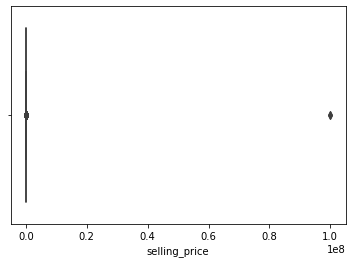

In [ ]:
sns.boxplot(dfa['selling_price'])

In [ ]:
dfa.groupby(dfa['material_ref'])['selling_price'].mean()

material_ref
-                                           867.30
.                                           703.00
0,35X1050                                  1162.00
0,37X1260                                  1122.67
0,3X935 DC01 NET GENT                       834.00
                                             ...  
zapytanie RK                                949.00
zapytanie TL                               1069.53
zapytanie ofertowe 013-10-2018-US-Serwi     819.20
zapytanie ofertowe 043-05-2019-US-Serwis    574.33
zapytannie TH                               957.09
Name: selling_price, Length: 16563, dtype: float64

# Removing Outliers and Filling Missing Values

In [ ]:
dfa['selling_price'].quantile(0.017346)


288.7142360000198

In [ ]:
dfa['selling_price'].quantile(0.9891)

1365.0

In [ ]:
df = dfa[(dfa['selling_price'] >dfa['selling_price'].quantile(0.017346))  & (dfa['selling_price'] <dfa['selling_price'].quantile(0.9891))]

In [ ]:
df.shape

(176524, 13)

In [ ]:
df.dropna(subset=['item_date'],inplace=True)
df.dropna(subset=['delivery date'],inplace=True)

<AxesSubplot:xlabel='selling_price'>

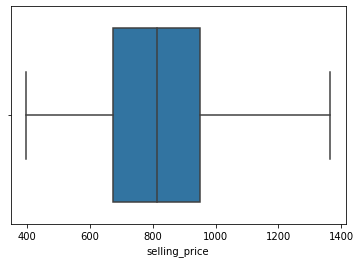

In [ ]:
sns.boxplot(df['selling_price'])

In [ ]:
df = df[df['item_date'] != 19950000]
df = df[df['item_date'] != 20191919]
df = df[df['delivery date'] != 30310101]
df = df[df['delivery date'] != 20212222]

In [ ]:
df.isna().sum()

item_date            0
quantity tons        0
customer             1
country              9
status               2
item type            0
application          5
thickness            1
width                0
material_ref     75540
product_ref          0
delivery date        0
selling_price        0
dtype: int64

In [ ]:
counts = df['material_ref'].value_counts()
values_over_200 = counts[counts > 250]
df_values_over_200 = pd.DataFrame({'material_ref': values_over_200.index, 'count': values_over_200.values})
print(df_values_over_200)

In [ ]:
df.material_ref.value_counts(normalize=False)

In [ ]:
df = df.drop('material_ref', axis=1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [ ]:
df.corr()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
item_date,1.00,0.00,-0.02,-0.02,0.01,0.03,0.05,0.59,0.59
customer,0.00,1.00,0.08,0.00,0.09,0.05,-0.03,0.01,-0.01
country,-0.02,0.08,1.00,-0.03,-0.04,0.06,-0.15,-0.07,-0.01
application,-0.02,0.00,-0.03,1.00,-0.13,-0.20,-0.13,-0.06,0.15
thickness,0.01,0.09,-0.04,-0.13,1.00,0.36,0.07,0.03,-0.32
width,0.03,0.05,0.06,-0.20,0.36,1.00,-0.04,0.02,-0.17
product_ref,0.05,-0.03,-0.15,-0.13,0.07,-0.04,1.00,0.09,-0.08
delivery date,0.59,0.01,-0.07,-0.06,0.03,0.02,0.09,1.00,0.48
selling_price,0.59,-0.01,-0.01,0.15,-0.32,-0.17,-0.08,0.48,1.00


<AxesSubplot:xlabel='selling_price', ylabel='thickness'>

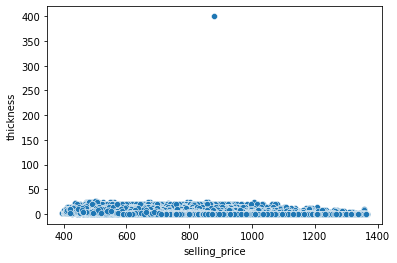

In [ ]:
sns.scatterplot(df['selling_price'],df['thickness'])

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

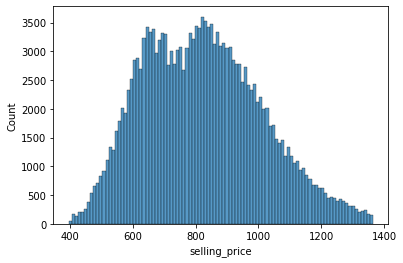

In [ ]:
sns.histplot(df['selling_price'])

In [ ]:
df.groupby(['country','application']).mean()['selling_price'].sort_values()

country  application
38.00    59.00          411.19
25.00    58.00          499.00
28.00    67.00          501.08
40.00    59.00          502.76
28.00    99.00          551.75
                         ...  
84.00    22.00         1118.58
113.00   41.00         1127.49
26.00    99.00         1178.19
38.00    29.00         1183.00
         66.00         1219.00
Name: selling_price, Length: 193, dtype: float64

In [ ]:
customer = df['customer']	
country = df['country']
status = df['status'],	
item_type =df['item type']
product= df['product_ref']
selling_price =df['selling_price']
from matplotlib import style

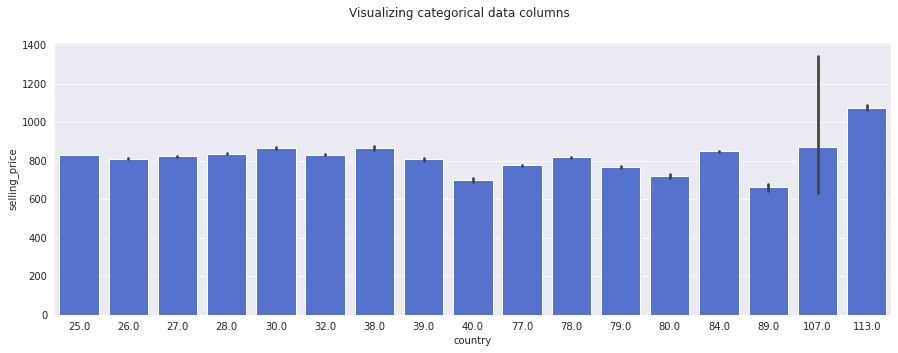

In [ ]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.barplot(x='country', y='selling_price', data=df, color='royalblue')
fig.suptitle('Visualizing categorical data columns')
plt.show()

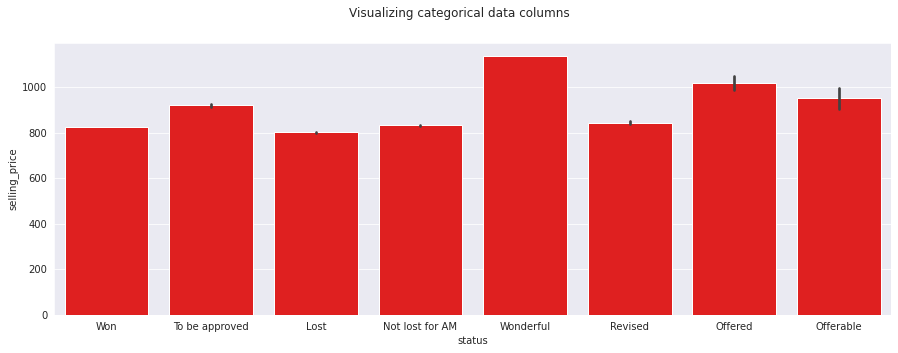

In [ ]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))


sns.barplot(x='status', y='selling_price', data=df, color='red')
fig.suptitle('Visualizing categorical data columns')
plt.show()

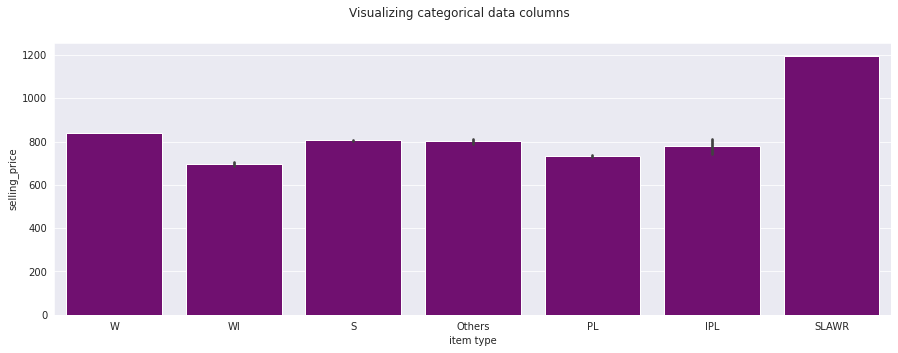

In [ ]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.barplot(x='item type', y='selling_price', data=df, color='purple')
fig.suptitle('Visualizing categorical data columns')
plt.show()

In [ ]:
item_date = pd.to_datetime(df['item_date'], format='%Y%m%d')
delivery_date = pd.to_datetime(df['delivery date'], format='%Y%m%d')

In [ ]:
df = df[df['quantity tons'] != 'e']

In [ ]:
df= df[df['quantity tons'].astype(float)>0]

In [ ]:
df.reset_index(drop=True,inplace=True)

# Labeling Categorical Data Using LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['customer'] = df['customer'].astype(str)
df['product_ref'] = df['product_ref'].astype(str)
df['quantity tons'] = df['quantity tons'].astype(float)

In [ ]:
df['country'] = encoder.fit_transform(df['country'])
df['customer'] = encoder.fit_transform(df['customer'])
df['item type'] = encoder.fit_transform(df['item type'])
df['product_ref'] = encoder.fit_transform(df['product_ref'])
df['application'] = encoder.fit_transform(df['application'])
df['status'] = encoder.fit_transform(df['status'])

In [ ]:
df.info()


# Spliting Data

In [ ]:
X=df.drop(['selling_price'],axis=1)
y= df['selling_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,  random_state=42)

# Training Data Using LazyPredict

In [ ]:
reg = LazyRegressor(
    ignore_warnings=True,
    custom_metric=None,
    regressors=[
        LinearRegression,
        Ridge,
        Lasso,
        ElasticNet,
        DecisionTreeRegressor,
        GradientBoostingRegressor,
        XGBRegressor,
        LGBMRegressor,
       
    ]
)

In [ ]:
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 8/8 [00:41<00:00,  5.22s/it]


r2 scores of models

In [ ]:
print(models)

                           Adjusted R-Squared  R-Squared   RMSE  Time Taken
Model                                                                      
XGBRegressor                             0.94       0.94  46.65       13.94
DecisionTreeRegressor                    0.93       0.93  51.59        1.11
LGBMRegressor                            0.92       0.92  52.99        1.28
GradientBoostingRegressor                0.88       0.88  65.52       24.89
LinearRegression                         0.53       0.53 129.21        0.15
Ridge                                    0.53       0.53 129.21        0.14
Lasso                                    0.53       0.53 129.31        0.12
ElasticNet                               0.49       0.49 135.48        0.11


# Hypertuning

In [ ]:
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

tree = DecisionTreeRegressor()

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score:  0.9262248206926653
